# Model Building Regression Problem

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')


In [12]:
df_cleaned = pd.read_csv('advance_houseprice_train.csv')

In [13]:
df_cleaned.head()

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,BuildingAge,RemodAge,GarageAge,AgeSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,

# Splitting the data


In [14]:
x = df_cleaned.drop('SalePrice',axis = 1)
y = df_cleaned[['SalePrice']]

#  Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [17]:
x_train.shape,x_test.shape,y_train.shape, y_test.shape

((1095, 281), (365, 281), (1095, 1), (365, 1))

# Importing Regression Tools

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

In [19]:
#Linear Regression

linear = LinearRegression()
lr = linear.fit(x_train,y_train)
y_pred_lr_test = linear.predict(x_test)
y_pred_lr_train = linear.predict(x_train)
r2_score_lr_test = r2_score(y_test, y_pred_lr_test)
r2_score_lr_train =  r2_score(y_train, y_pred_lr_train)
mape_lr_test = mean_absolute_percentage_error(y_test, y_pred_lr_test)

# Ridge

ridge = Ridge(alpha = 0.3)
rid = ridge.fit(x_train,y_train)
y_pred_rid_test = ridge.predict(x_test)
y_pred_rid_train = ridge.predict(x_train)
r2_score_rid_test = r2_score(y_test, y_pred_rid_test)
r2_score_rid_train =  r2_score(y_train, y_pred_rid_train)
mape_rid_test = mean_absolute_percentage_error(y_test, y_pred_rid_test)

#Lasso

lasso = Lasso(alpha = 0.1)
las = lasso.fit(x_train,y_train)
y_pred_las_test = lasso.predict(x_test)
y_pred_las_train = lasso.predict(x_train)
r2_score_las_test = r2_score(y_test, y_pred_las_test)
r2_score_las_train =  r2_score(y_train, y_pred_las_train)
mape_las_test = mean_absolute_percentage_error(y_test, y_pred_las_test)

# RandomForest
rfmodel = RandomForestRegressor()
rf = rfmodel.fit(x_train, y_train)
y_pred_rf_test = rfmodel.predict(x_test)
y_pred_rf_train = rfmodel.predict(x_train)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)
r2_score_rf_train =  r2_score(y_train, y_pred_rf_train)
mape_rf_test = mean_absolute_percentage_error(y_test, y_pred_rf_test)


#SVR

svr = SVR()
sv = svr.fit(x_train, y_train)
y_pred_sv_test = svr.predict(x_test)
y_pred_sv_train = svr.predict(x_train)
r2_score_sv_test = r2_score(y_test, y_pred_sv_test)
r2_score_sv_train =  r2_score(y_train, y_pred_sv_train)
mape_sv_test = mean_absolute_percentage_error(y_test, y_pred_sv_test)

#XGBRegressor
xgb = XGBRegressor()
xg = xgb.fit(x_train, y_train)
y_pred_xg_test = xgb.predict(x_test)
y_pred_xg_train = xgb.predict(x_train)
r2_score_xg_test = r2_score(y_test, y_pred_xg_test)
r2_score_xg_train =  r2_score(y_train, y_pred_xg_train)
mape_xg_test = mean_absolute_percentage_error(y_test, y_pred_xg_test)


In [20]:
print(r2_score_lr_train)
print (r2_score_lr_test)
print(mape_lr_test)

0.9407533865163138
0.5649252608784104
0.10990482860182876


In [21]:
print(r2_score_rid_train)
print (r2_score_rid_test)
print(mape_rid_test)

0.93810691340121
0.6734863778707227
0.11344739094933125


In [22]:
print(r2_score_las_train)
print (r2_score_las_test)
print(mape_las_test)

0.9397357636456941
0.7491308659566068
0.10894091500214093


In [23]:
print(r2_score_rf_train)
print (r2_score_rf_test)
print(mape_rf_test)

0.9753305466230112
0.8358433877056121
0.11240135062457574


In [24]:
print(r2_score_sv_train)
print (r2_score_sv_test)
print(mape_sv_test)

-0.04546049423139498
-0.024853598254753972
0.33733799529288466


In [25]:
print(r2_score_xg_train)
print (r2_score_xg_test)
print(mape_xg_test)

0.9995923129886186
0.8532604751081578
0.11191874852146544


# 8. Feature Selection using VIF

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
import statsmodels.api as sm

In [28]:
x = sm.add_constant(x)

In [43]:
x.head()

,const,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,BuildingAge,RemodAge,GarageAge,AgeSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,Gara

In [44]:
variable = x

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x.columns

In [45]:
vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(1)

,Variance Inflation Factor,Features
242,inf,GarageType_None


In [46]:
vif_threshold = 5

In [47]:
x_vif1 = x.drop('GarageType_None',axis = 1)

In [48]:
variable = x_vif1

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif1.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(1)

,Variance Inflation Factor,Features
252,inf,GarageCond_None


In [49]:
x_vif2 = x_vif1.drop('GarageCond_None',axis = 1)

In [50]:
variable = x_vif2

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif2.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(1)

,Variance Inflation Factor,Features
120,inf,OverallCond_2


In [51]:
x_vif3 = x_vif2.drop('OverallCond_2',axis = 1)

In [52]:
variable = x_vif3

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif3.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(1)

,Variance Inflation Factor,Features
177,inf,ExterCond_Po


In [53]:
x_vif4 = x_vif3.drop('ExterCond_Po',axis = 1)

In [54]:
variable = x_vif4

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif4.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(1)

,Variance Inflation Factor,Features
188,inf,BsmtCond_None


In [55]:
x_vif5 = x_vif4.drop('BsmtCond_None',axis = 1)

In [56]:
variable = x_vif5

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif5.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(1)

,Variance Inflation Factor,Features
244,inf,GarageQual_None


In [57]:
x_vif6 = x_vif5.drop('GarageQual_None',axis = 1)

In [58]:
variable = x_vif6

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif6.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(1)

,Variance Inflation Factor,Features
36,inf,MSSubClass_90


In [59]:
x_vif7 = x_vif6.drop('MSSubClass_90',axis = 1)

In [60]:
variable = x_vif7

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif7.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(1)

,Variance Inflation Factor,Features
141,inf,Exterior1st_CBlock


In [61]:
x_vif8 = x_vif7.drop('Exterior1st_CBlock',axis = 1)

In [62]:
variable = x_vif8

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif8.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(1)

,Variance Inflation Factor,Features
183,inf,BsmtQual_None


In [63]:
x_vif9 = x_vif8.drop('BsmtQual_None',axis = 1)

In [64]:
variable = x_vif9

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif9.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(2)

,Variance Inflation Factor,Features
0,65428.879491,const
256,1037.134407,MiscFeature_None


In [65]:
x_vif10 = x_vif9.drop('MiscFeature_None',axis = 1)

In [66]:
variable = x_vif10

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif10.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(2)

,Variance Inflation Factor,Features
0,42142.335980,const
113,475.337563,OverallQual_5


In [67]:
x_vif11 = x_vif10.drop('OverallQual_5',axis = 1)

In [68]:
variable = x_vif11

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif11.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(2)

,Variance Inflation Factor,Features
0,39213.405267,const
174,311.485818,ExterCond_TA


In [69]:
x_vif12 = x_vif11.drop('ExterCond_TA',axis = 1)

In [70]:
variable = x_vif12

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif12.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(2)

,Variance Inflation Factor,Features
0,37801.689472,const
244,304.388893,GarageCond_TA


In [71]:
x_vif13 = x_vif12.drop('GarageCond_TA',axis = 1)

In [72]:
variable = x_vif13

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif13.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(2)

,Variance Inflation Factor,Features
0,37700.175170,const
21,244.127122,PoolArea


In [73]:
x_vif14 = x_vif13.drop('PoolArea',axis = 1)

In [74]:
variable = x_vif14

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif14.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(2)

,Variance Inflation Factor,Features
0,16001.085556,const
124,164.268274,RoofStyle_Gable


In [75]:
x_vif15 = x_vif14.drop('RoofStyle_Gable',axis = 1)

In [76]:
variable = x_vif15

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif15.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(2)

,Variance Inflation Factor,Features
0,15018.327318,const
119,145.836162,OverallCond_5


In [77]:
x_vif16 = x_vif15.drop('OverallCond_5',axis = 1)

In [78]:
variable = x_vif16

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif16.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(2)

,Variance Inflation Factor,Features
0,14431.332499,const
144,122.025014,Exterior1st_VinylSd


In [79]:
x_vif17 = x_vif16.drop('Exterior1st_VinylSd',axis = 1)

In [80]:
variable = x_vif17

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif17.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(2)

,Variance Inflation Factor,Features
0,14430.356076,const
188,90.874790,BsmtFinType1_None


In [81]:
x_vif18 = x_vif17.drop('BsmtFinType1_None',axis = 1)

In [82]:
variable = x_vif18

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif18.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(2)

,Variance Inflation Factor,Features
0,14307.317543,const
224,83.272911,GarageType_Attchd


In [83]:
x_vif19 = x_vif18.drop('GarageType_Attchd',axis = 1)

In [84]:
variable = x_vif19

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif19.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(2)

,Variance Inflation Factor,Features
0,14008.837193,const
127,70.495999,RoofMatl_CompShg


In [85]:
x_vif20 = x_vif19.drop('RoofMatl_CompShg',axis = 1)

In [86]:
variable = x_vif20

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif20.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(2)

,Variance Inflation Factor,Features
0,8739.045655,const
233,58.086391,GarageQual_TA


In [87]:
x_vif21 = x_vif20.drop('GarageQual_TA',axis = 1)

In [88]:
variable = x_vif21

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif21.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(2)

,Variance Inflation Factor,Features
0,7963.079040,const
41,52.954434,MSZoning_RL


In [89]:
x_vif22 = x_vif21.drop('MSZoning_RL',axis = 1)

In [90]:
variable = x_vif22

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif22.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(2)

,Variance Inflation Factor,Features
0,7681.161127,const
252,52.845241,SaleType_New


In [91]:
x_vif23 = x_vif22.drop('SaleType_New',axis = 1)

In [92]:
variable = x_vif23

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif23.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(2)

,Variance Inflation Factor,Features
0,7676.806195,const
102,51.703287,HouseStyle_1Story


In [93]:
x_vif24 = x_vif23.drop('HouseStyle_1Story',axis = 1)

In [94]:
variable = x_vif24

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif24.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(2)

,Variance Inflation Factor,Features
0,7476.657648,const
150,50.732941,Exterior2nd_MetalSd


In [95]:
x_vif25 = x_vif24.drop('Exterior2nd_MetalSd',axis = 1)

In [96]:
variable = x_vif25

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif25.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(2)

,Variance Inflation Factor,Features
0,7448.969653,const
38,45.152462,MSSubClass_190


In [97]:
x_vif26 = x_vif25.drop('MSSubClass_190',axis = 1)

In [98]:
variable = x_vif26

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif26.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(2)

,Variance Inflation Factor,Features
0,7421.752334,const
99,44.706218,BldgType_TwnhsE


In [99]:
x_vif27 = x_vif26.drop('BldgType_TwnhsE',axis = 1)

In [100]:
variable = x_vif27

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif27.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(2)

,Variance Inflation Factor,Features
0,7413.352495,const
190,41.528946,Heating_GasA


In [101]:
x_vif28 = x_vif27.drop('Heating_GasA',axis = 1)

In [102]:
variable = x_vif28

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif28.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(2)

,Variance Inflation Factor,Features
0,5238.885782,const
156,32.629302,MasVnrType_None


In [103]:
x_vif29 = x_vif28.drop('MasVnrType_None',axis = 1)

In [104]:
variable = x_vif29

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif29.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(2)

,Variance Inflation Factor,Features
0,5084.225662,const
132,28.933002,Exterior1st_CemntBd


In [105]:
x_vif30 = x_vif29.drop('Exterior1st_CemntBd',axis = 1)

In [106]:
variable = x_vif30

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif30.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(2)

,Variance Inflation Factor,Features
0,5073.806406,const
212,27.385752,FireplaceQu_None


In [107]:
x_vif31 = x_vif30.drop('FireplaceQu_None',axis = 1)

In [109]:
variable = x_vif31

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif31.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(2)

,Variance Inflation Factor,Features
0,4983.872457,const
102,26.289156,HouseStyle_2Story


In [110]:
x_vif32 = x_vif31.drop('HouseStyle_2Story',axis = 1)

In [111]:
variable = x_vif32

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif32.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(2)

,Variance Inflation Factor,Features
0,4982.496965,const
184,23.517853,BsmtFinType2_None


In [112]:
x_vif33 = x_vif32.drop('BsmtFinType2_None',axis = 1)

In [113]:
variable = x_vif33

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif33.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(2)

,Variance Inflation Factor,Features
0,4965.545560,const
68,23.336424,Neighborhood_NAmes


In [114]:
x_vif34 = x_vif33.drop('Neighborhood_NAmes',axis = 1)

In [115]:
variable = x_vif34

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif34.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(2)

,Variance Inflation Factor,Features
0,4826.613065,const
149,22.403428,Exterior2nd_VinylSd


In [116]:
x_vif35 = x_vif34.drop('Exterior2nd_VinylSd',axis = 1)

In [117]:
variable = x_vif35

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif35.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(2)

,Variance Inflation Factor,Features
0,4677.062815,const
155,21.355489,ExterQual_TA


In [118]:
x_vif36 = x_vif35.drop('ExterQual_TA',axis = 1)

In [119]:
variable = x_vif36

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif36.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(2)

,Variance Inflation Factor,Features
0,4619.490640,const
22,18.056435,BuildingAge


In [120]:
x_vif37 = x_vif36.drop('BuildingAge',axis = 1)

In [121]:
variable = x_vif37

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif37.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(2)

,Variance Inflation Factor,Features
0,4565.804935,const
101,17.729831,HouseStyle_SLvl


In [122]:
x_vif38 = x_vif37.drop('HouseStyle_SLvl',axis = 1)

In [123]:
variable = x_vif38

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif38.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(2)

,Variance Inflation Factor,Features
0,4551.635651,const
88,16.984204,Condition2_Norm


In [124]:
x_vif39 = x_vif38.drop('Condition2_Norm',axis = 1)

In [125]:
variable = x_vif39

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif39.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(3)

,Variance Inflation Factor,Features
0,2817.371635,const
5,14.012214,GrLivArea
127,13.917309,Exterior1st_HdBoard


In [126]:
x_vif40 = x_vif39.drop('Exterior1st_HdBoard',axis = 1)

In [127]:
variable = x_vif40

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif40.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(3)

,Variance Inflation Factor,Features
0,2815.579085,const
5,14.007174,GrLivArea
161,11.510613,BsmtQual_TA


In [128]:
x_vif41 = x_vif40.drop('BsmtQual_TA',axis = 1)

In [129]:
variable = x_vif41

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif41.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(3)

,Variance Inflation Factor,Features
0,2803.850672,const
5,13.925617,GrLivArea
177,10.958155,BsmtFinType2_Unf


In [130]:
x_vif42 = x_vif41.drop('BsmtFinType2_Unf',axis = 1)

In [131]:
variable = x_vif42

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif42.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(3)

,Variance Inflation Factor,Features
0,2730.575367,const
5,13.839191,GrLivArea
192,10.870081,KitchenQual_TA


In [132]:
x_vif43 = x_vif42.drop('KitchenQual_TA',axis = 1)

In [133]:
variable = x_vif43

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif43.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(3)

,Variance Inflation Factor,Features
0,2699.943060,const
5,13.816098,GrLivArea
96,10.827782,HouseStyle_1.5Unf


In [134]:
x_vif44 = x_vif43.drop('HouseStyle_1.5Unf',axis = 1)

In [135]:
variable = x_vif44

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif44.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(3)

,Variance Inflation Factor,Features
0,2699.603857,const
5,13.802249,GrLivArea
196,10.481754,Functional_Typ


In [136]:
x_vif45 = x_vif44.drop('Functional_Typ',axis = 1)

In [137]:
variable = x_vif45

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif45.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(3)

,Variance Inflation Factor,Features
0,2383.403630,const
5,13.670136,GrLivArea
144,8.028210,Exterior2nd_Wd Sdng


In [138]:
x_vif46 = x_vif45.drop('Exterior2nd_Wd Sdng',axis = 1)

In [139]:
variable = x_vif46

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif46.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(3)

,Variance Inflation Factor,Features
0,2382.751156,const
5,13.669659,GrLivArea
153,7.939155,Foundation_PConc


In [140]:
x_vif47 = x_vif46.drop('Foundation_PConc',axis = 1)

In [141]:
variable = x_vif47

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif47.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(3)

,Variance Inflation Factor,Features
0,2358.082164,const
5,13.669658,GrLivArea
14,7.932654,GarageCars


In [142]:
x_vif48 = x_vif47.drop('GarageCars',axis = 1)

In [143]:
variable = x_vif48

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif48.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(3)

,Variance Inflation Factor,Features
0,2354.363515,const
5,13.665786,GrLivArea
22,6.928215,GarageAge


In [144]:
x_vif49 = x_vif48.drop('GarageAge',axis = 1)

In [145]:
variable = x_vif49

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif49.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(3)

,Variance Inflation Factor,Features
0,2284.636555,const
5,13.530068,GrLivArea
4,6.708964,TotalBsmtSF


In [146]:
x_vif50 = x_vif49.drop('TotalBsmtSF',axis = 1)

In [147]:
variable = x_vif50

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif50.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(3)

,Variance Inflation Factor,Features
0,2284.346910,const
4,10.662023,GrLivArea
72,6.583783,Neighborhood_Somerst


In [148]:
x_vif51 = x_vif50.drop('Neighborhood_Somerst',axis = 1)

In [149]:
variable = x_vif51

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif51.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(3)

,Variance Inflation Factor,Features
0,2284.064911,const
4,10.642006,GrLivArea
28,6.560383,MSSubClass_75


In [150]:
x_vif52 = x_vif51.drop('MSSubClass_75',axis = 1)

In [151]:
variable = x_vif52

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif52.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(3)

,Variance Inflation Factor,Features
0,2121.706136,const
4,10.641425,GrLivArea
11,6.540161,TotRmsAbvGrd


In [152]:
x_vif53 = x_vif52.drop('TotRmsAbvGrd',axis = 1)

In [153]:
variable = x_vif53

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif53.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(3)

,Variance Inflation Factor,Features
0,2117.055438,const
4,8.141244,GrLivArea
11,5.940793,Fireplaces


In [154]:
x_vif54 = x_vif53.drop('Fireplaces',axis = 1)

In [155]:
variable = x_vif54

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif54.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(3)

,Variance Inflation Factor,Features
0,2115.357993,const
4,7.825583,GrLivArea
212,5.773126,Fence_None


In [156]:
x_vif55 = x_vif54.drop('Fence_None',axis = 1)

In [157]:
variable = x_vif55

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif55.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(3)

,Variance Inflation Factor,Features
0,2108.279742,const
4,7.824161,GrLivArea
73,5.438963,Condition1_Norm


In [158]:
x_vif56 = x_vif55.drop('Condition1_Norm',axis = 1)

In [159]:
variable = x_vif56

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif56.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(3)

,Variance Inflation Factor,Features
0,2101.299236,const
4,7.818923,GrLivArea
220,5.248851,SaleType_WD


In [160]:
x_vif57 = x_vif56.drop('SaleType_WD',axis = 1)

In [161]:
variable = x_vif57

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif57.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(3)

,Variance Inflation Factor,Features
0,2039.027308,const
4,7.763141,GrLivArea
65,5.227933,Neighborhood_OldTown


In [162]:
x_vif58 = x_vif57.drop('Neighborhood_OldTown',axis = 1)

In [163]:
variable = x_vif58

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable,i) for i in range(variable.shape[1])]

vif['Features'] = x_vif58.columns

vif.sort_values(by = 'Variance Inflation Factor',ascending=False).head(3)

,Variance Inflation Factor,Features
0,2036.324869,const
4,7.761765,GrLivArea
155,4.966727,BsmtExposure_None


In [164]:
X_selected = x_vif58

In [165]:
X_selected.shape

(1460, 224)

In [166]:
X_selected.head()

,const,LotFrontage,LotArea,MasVnrArea,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,RemodAge,AgeSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_85,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSZoning_FV,MSZoning_RH,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_SFoyer,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_3,OverallCond_4,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,Foundation_CBlock,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,65.0,8450,196.0,1710,1,0,2,1,3,1,548,0,61,0,0,0,0,20,15,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.0,80.0,9600,0

In [167]:
# Running regression again.

In [168]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_selected, y, test_size=0.30, random_state=42)

In [169]:
x_train1.shape,x_test1.shape,y_train1.shape, y_test1.shape

((1022, 224), (438, 224), (1022, 1), (438, 1))

In [170]:
#Linear Regression

linear1 = LinearRegression()
lr1 = linear1.fit(x_train1,y_train1)
y_pred_lr1_test = linear1.predict(x_test1)
y_pred_lr1_train = linear1.predict(x_train1)
r2_score_lr1_test = r2_score(y_test1, y_pred_lr1_test)
r2_score_lr1_train =  r2_score(y_train1, y_pred_lr1_train)
mape_lr1_test = mean_absolute_percentage_error(y_test1, y_pred_lr1_test)

# Ridge

ridge1 = Ridge(alpha = 0.3)
rid1 = ridge.fit(x_train1,y_train1)
y_pred_rid1_test = ridge.predict(x_test1)
y_pred_rid1_train = ridge.predict(x_train1)
r2_score_rid1_test = r2_score(y_test1, y_pred_rid1_test)
r2_score_rid1_train =  r2_score(y_train1, y_pred_rid1_train)
mape_rid1_test = mean_absolute_percentage_error(y_test1, y_pred_rid1_test)

#Lasso

lasso1 = Lasso(alpha = 0.1)
las1 = lasso1.fit(x_train1,y_train1)
y_pred_las1_test = lasso1.predict(x_test1)
y_pred_las1_train = lasso1.predict(x_train1)
r2_score_las1_test = r2_score(y_test1, y_pred_las1_test)
r2_score_las1_train =  r2_score(y_train1, y_pred_las1_train)
mape_las1_test = mean_absolute_percentage_error(y_test1, y_pred_las1_test)

# RandomForest
rfmodel1 = RandomForestRegressor()
rf1 = rfmodel1.fit(x_train1, y_train1)
y_pred_rf1_test = rfmodel1.predict(x_test1)
y_pred_rf1_train = rfmodel1.predict(x_train1)
r2_score_rf1_test = r2_score(y_test1, y_pred_rf1_test)
r2_score_rf1_train =  r2_score(y_train1, y_pred_rf1_train)
mape_rf1_test = mean_absolute_percentage_error(y_test1, y_pred_rf1_test)

#XGBRegressor
xgb1 = XGBRegressor()
xg1 = xgb1.fit(x_train1, y_train1)
y_pred_xg1_test = xgb1.predict(x_test1)
y_pred_xg1_train = xgb1.predict(x_train1)
r2_score_xg1_test = r2_score(y_test1, y_pred_xg1_test)
r2_score_xg1_train =  r2_score(y_train1, y_pred_xg1_train)
mape_xg1_test = mean_absolute_percentage_error(y_test1, y_pred_xg1_test)


In [171]:

print(r2_score_lr1_train)
print (r2_score_lr1_test)
print(mape_lr1_test)

0.9140185319170306
0.8385817389817591
0.13694047627205327


In [172]:
print(r2_score_rid1_train)
print (r2_score_rid1_test)
print(mape_rid1_test)

0.9112835659038114
0.8580102961487216
0.1303716330985557


In [173]:
print(r2_score_las1_train)
print (r2_score_las1_test)
print(mape_las1_test)

0.9140182977791189
0.837006303381848
0.13736349484243443


In [174]:
print(r2_score_rf1_train)
print (r2_score_rf1_test)
print(mape_rf1_test)

0.9694679394045139
0.842627499739748
0.11481378442478735


In [175]:
print(r2_score_xg1_train)
print (r2_score_xg1_test)
print(mape_xg1_test)

0.9994778827920281
0.8777519645566665
0.11088816494006618


In [176]:
X_selected.shape

(1460, 224)

# Applying OLS and removing insignificant variables

In [177]:
# addition of constant

In [178]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [179]:
x1 = X_selected

In [180]:
reg_model = smf.OLS(endog = y, exog = x1).fit()
results = reg_model.summary()

In [181]:
d = {}
for i in x1.columns.tolist():
    d[f'{i}'] = reg_model.pvalues[i]

df_pvalue= pd.DataFrame(d.items(), columns=['Var_name', 'p-Value']).sort_values(by = 'p-Value',ascending = False).reset_index(drop=True)

In [182]:
df_pvalue[df_pvalue['p-Value'] > 0.05]

,Var_name,p-Value
0,GarageCond_Po,0.976841
1,BsmtCond_Po,0.973775
2,HeatingQC_Fa,0.960276
3,HouseStyle_SFoyer,0.957464
4,BsmtQual_Fa,0.938024
5,Exterior1st_BrkComm,0.932275
6,Condition1_PosN,0.924961
7,Exterior1st_AsphShn,0.908588
8,HeatingQC_Po,0.899791
9,MSSubClass_45,0.861588


In [183]:
def backward_elimination(X,y, significance_level = 0.05):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    num_iterations = 0
    
    while True:
        max_pvalue = model.pvalues[1:].max()  # Skip the constant term
        if max_pvalue > significance_level:
            # Find the variable with the highest p-value and remove it
            remove_variable = model.pvalues[1:].idxmax()
            X = X.drop(remove_variable, axis=1)
            model = sm.OLS(y, X).fit()
            num_iterations += 1
        else:
            break
            
    selected_features = X.columns[1:]  # Exclude the constant term

    return selected_features, model.summary(),num_iterations
            
    

In [184]:
final_model = backward_elimination(x1,y)
final_model

(Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'GrLivArea', 'BsmtFullBath',
        'FullBath', 'HalfBath', 'KitchenAbvGr', 'GarageArea', 'WoodDeckSF',
        'ScreenPorch', 'RemodAge', 'MSSubClass_30', 'MSSubClass_50',
        'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_120', 'MSSubClass_160',
        'MSSubClass_180', 'MSZoning_FV', 'Street_Pave', 'LotShape_IR2',
        'LandContour_Lvl', 'LotConfig_CulDSac', 'LandSlope_Mod',
        'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NoRidge',
        'Neighborhood_NridgHt', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr',
        'Condition1_Feedr', 'Condition1_RRAe', 'Condition2_PosA',
        'Condition2_PosN', 'BldgType_2fmCon', 'HouseStyle_2.5Fin',
        'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9',
        'OverallQual_10', 'OverallCond_3', 'OverallCond_4', 'OverallCond_7',
        'RoofMatl_WdShngl', 'Exterior1st_BrkFace', 'Exterior2nd_CmentBd',
        'Exterior2nd_Stucco', 'BsmtCond_TA'

In [185]:
x_ols = x1[['LotFrontage', 'LotArea', 'MasVnrArea', 'GrLivArea', 'BsmtFullBath',
        'FullBath', 'HalfBath', 'KitchenAbvGr', 'GarageArea', 'WoodDeckSF',
        'ScreenPorch', 'RemodAge', 'MSSubClass_30', 'MSSubClass_50',
        'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_120', 'MSSubClass_160',
        'MSSubClass_180', 'MSZoning_FV', 'Street_Pave', 'LotShape_IR2',
        'LandContour_Lvl', 'LotConfig_CulDSac', 'LandSlope_Mod',
        'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NoRidge',
        'Neighborhood_NridgHt', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr',
        'Condition1_Feedr', 'Condition1_RRAe', 'Condition2_PosA',
        'Condition2_PosN', 'BldgType_2fmCon', 'HouseStyle_2.5Fin',
        'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9',
        'OverallQual_10', 'OverallCond_3', 'OverallCond_4', 'OverallCond_7',
        'RoofMatl_WdShngl', 'Exterior1st_BrkFace', 'Exterior2nd_CmentBd',
        'Exterior2nd_Stucco', 'BsmtCond_TA', 'BsmtExposure_Gd',
        'BsmtExposure_No', 'BsmtExposure_None', 'BsmtFinType1_GLQ',
        'BsmtFinType1_Unf', 'Heating_OthW', 'HeatingQC_Gd', 'HeatingQC_TA',
        'Functional_Min1', 'Functional_Min2', 'Functional_Sev',
        'FireplaceQu_Gd', 'FireplaceQu_TA', 'PoolQC_Fa', 'PoolQC_Gd',
        'PoolQC_None', 'SaleCondition_Alloca', 'SaleCondition_Normal',
        'SaleCondition_Partial']]

In [186]:
x_ols.shape

(1460, 69)

In [187]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_ols, y, test_size=0.30, random_state=42)

In [188]:
x_train2.shape,x_test2.shape,y_train2.shape, y_test2.shape

((1022, 69), (438, 69), (1022, 1), (438, 1))

In [189]:
from math import sqrt

In [190]:
#Linear Regression

linear2 = LinearRegression()
lr2 = linear2.fit(x_train2,y_train2)
y_pred_lr2_test = linear2.predict(x_test2)
y_pred_lr2_train = linear2.predict(x_train2)
r2_score_lr2_test = r2_score(y_test1, y_pred_lr2_test)
r2_score_lr2_train =  r2_score(y_train1, y_pred_lr2_train)
mape_lr2_test = mean_absolute_percentage_error(y_test2, y_pred_lr2_test)
mape_lr2_train = mean_absolute_percentage_error(y_train2, y_pred_lr2_train)
mse_lr2_test = sqrt(mean_squared_error(y_test2, y_pred_lr2_test))
mse_lr2_train = sqrt(mean_squared_error(y_train2, y_pred_lr2_train))



# Ridge

ridge2 = Ridge(alpha = 0.3)
rid2 = ridge2.fit(x_train2,y_train2)
y_pred_rid2_test = ridge2.predict(x_test2)
y_pred_rid2_train = ridge2.predict(x_train2)
r2_score_rid2_test = r2_score(y_test2, y_pred_rid2_test)
r2_score_rid2_train =  r2_score(y_train2, y_pred_rid2_train)
mape_rid2_test = mean_absolute_percentage_error(y_test2, y_pred_rid2_test)
mape_rid2_train = mean_absolute_percentage_error(y_train2, y_pred_rid2_train)
mse_rid2_test = sqrt(mean_squared_error(y_test2, y_pred_rid2_test))
mse_rid2_train = sqrt(mean_squared_error(y_train2, y_pred_rid2_train))

#Lasso

lasso2 = Lasso(alpha = 0.1)
las2 = lasso2.fit(x_train2,y_train2)
y_pred_las2_test = lasso2.predict(x_test2)
y_pred_las2_train = lasso2.predict(x_train2)
r2_score_las2_test = r2_score(y_test2, y_pred_las2_test)
r2_score_las2_train =  r2_score(y_train2, y_pred_las2_train)
mape_las2_test = mean_absolute_percentage_error(y_test2, y_pred_las2_test)
mape_las2_train = mean_absolute_percentage_error(y_train2, y_pred_las2_train)
mse_las2_test = sqrt(mean_squared_error(y_test2, y_pred_las2_test))
mse_las2_train = sqrt(mean_squared_error(y_train2, y_pred_las2_train))

# RandomForest
rfmodel2 = RandomForestRegressor()
rf2 = rfmodel2.fit(x_train2, y_train2)
y_pred_rf2_test = rfmodel2.predict(x_test2)
y_pred_rf2_train = rfmodel2.predict(x_train2)
r2_score_rf2_test = r2_score(y_test2, y_pred_rf2_test)
r2_score_rf2_train =  r2_score(y_train2, y_pred_rf2_train)
mape_rf2_test = mean_absolute_percentage_error(y_test2, y_pred_rf2_test)
mape_rf2_train = mean_absolute_percentage_error(y_train2, y_pred_rf2_train)
mse_rf2_test = sqrt(mean_squared_error(y_test2, y_pred_rf2_test))
mse_rf2_train = sqrt(mean_squared_error(y_train2, y_pred_rf2_train))


#XGBRegressor
xgb2 = XGBRegressor()
xg2 = xgb2.fit(x_train2, y_train2)
y_pred_xg2_test = xgb2.predict(x_test2)
y_pred_xg2_train = xgb2.predict(x_train2)
r2_score_xg2_test = r2_score(y_test2, y_pred_xg2_test)
r2_score_xg2_train =  r2_score(y_train2, y_pred_xg2_train)
mape_xg2_test = mean_absolute_percentage_error(y_test2, y_pred_xg2_test)
mape_xg2_train = mean_absolute_percentage_error(y_train2, y_pred_xg2_train)
mse_xg2_test = sqrt(mean_squared_error(y_test2, y_pred_xg2_test))
mse_xg2_train = sqrt(mean_squared_error(y_train2, y_pred_xg2_train))


In [191]:
print('r2_score:')
print(r2_score_lr2_train)
print (r2_score_lr2_test)
print('MAPE:')
print(mape_lr2_train)
print(mape_lr2_test)
print('RMSE')
print(mse_lr2_train)
print(mse_lr2_test)

r2_score:
0.8953752601834114
0.8688267784031134
MAPE:
0.09776190133517684
0.11393901023136814
RMSE
25093.662395049887
30254.570551034823


In [192]:
print('r2_score:')
print(r2_score_rid2_train)
print (r2_score_rid2_test)
print('MAPE:')
print(mape_rid2_train)
print(mape_rid2_test)
print('RMSE')
print(mse_rid2_train)
print(mse_rid2_test)

r2_score:
0.8932644088571721
0.8806585985704913
MAPE:
0.0978485874528769
0.11015473369500452
RMSE
25345.536301393455
28857.849690110448


In [193]:
print('r2_score:')
print(r2_score_las2_train)
print (r2_score_las2_test)
print('MAPE:')
print(mape_las2_train)
print(mape_las2_test)
print('RMSE')
print(mse_las2_train)
print(mse_las2_test)

r2_score:
0.895375239479293
0.8688488294335761
MAPE:
0.09775942414930038
0.11392484221094931
RMSE
25093.66487793364
30252.027453865794


In [194]:
print('r2_score:')
print(r2_score_rf2_train)
print (r2_score_rf2_test)
print('MAPE:')
print(mape_rf2_train)
print(mape_rf2_test)
print('RMSE')
print(mse_rf2_train)
print(mse_rf2_test)

r2_score:
0.9704328748249118
0.8568300269236476
MAPE:
0.04493618507231906
0.11557339111432399
RMSE
13339.86410108639
31607.807514567397


In [195]:
print('r2_score:')
print(r2_score_xg2_train)
print (r2_score_xg2_test)
print('MAPE:')
print(mape_xg2_train)
print(mape_xg2_test)
print('RMSE')
print(mse_xg2_train)
print(mse_xg2_test)

r2_score:
0.9994640315823683
0.8769953354278551
MAPE:
0.00845453442677771
0.10854347172496459
RMSE
1796.0418619657783
29297.40743508402


# Feature Selection with Lasso 

In [196]:
for alpha in [0.001,0.01,0.1,1,10,100,200,500,750,1000]:
    lasso_reg = Lasso(alpha = alpha)
    lasso_reg.fit(x_train2,y_train2)
    selected_features = np.array(x_train2.columns)[np.abs(lasso_reg.coef_) != 0]
    
    print('alpha:', alpha)
    print('Selected Features:',selected_features)

alpha: 0.001
Selected Features: ['LotFrontage' 'LotArea' 'MasVnrArea' 'GrLivArea' 'BsmtFullBath'
 'FullBath' 'HalfBath' 'KitchenAbvGr' 'GarageArea' 'WoodDeckSF'
 'ScreenPorch' 'RemodAge' 'MSSubClass_30' 'MSSubClass_50' 'MSSubClass_60'
 'MSSubClass_70' 'MSSubClass_120' 'MSSubClass_160' 'MSSubClass_180'
 'MSZoning_FV' 'Street_Pave' 'LotShape_IR2' 'LandContour_Lvl'
 'LotConfig_CulDSac' 'LandSlope_Mod' 'Neighborhood_Crawfor'
 'Neighborhood_Edwards' 'Neighborhood_NoRidge' 'Neighborhood_NridgHt'
 'Neighborhood_SawyerW' 'Neighborhood_StoneBr' 'Condition1_Feedr'
 'Condition1_RRAe' 'Condition2_PosN' 'BldgType_2fmCon' 'HouseStyle_2.5Fin'
 'OverallQual_6' 'OverallQual_7' 'OverallQual_8' 'OverallQual_9'
 'OverallQual_10' 'OverallCond_3' 'OverallCond_4' 'OverallCond_7'
 'RoofMatl_WdShngl' 'Exterior1st_BrkFace' 'Exterior2nd_CmentBd'
 'Exterior2nd_Stucco' 'BsmtCond_TA' 'BsmtExposure_Gd' 'BsmtExposure_No'
 'BsmtExposure_None' 'BsmtFinType1_GLQ' 'BsmtFinType1_Unf' 'Heating_OthW'
 'HeatingQC_Gd' 'Heatin

alpha: 1000
Selected Features: ['LotArea' 'MasVnrArea' 'GrLivArea' 'BsmtFullBath' 'FullBath'
 'KitchenAbvGr' 'GarageArea' 'WoodDeckSF' 'ScreenPorch' 'RemodAge'
 'LotConfig_CulDSac' 'Neighborhood_Edwards' 'Neighborhood_NridgHt'
 'Condition1_Feedr' 'OverallQual_6' 'OverallQual_8' 'OverallQual_9'
 'Exterior1st_BrkFace' 'BsmtCond_TA' 'BsmtExposure_Gd' 'BsmtExposure_No'
 'BsmtFinType1_GLQ' 'BsmtFinType1_Unf' 'HeatingQC_TA' 'FireplaceQu_Gd'
 'FireplaceQu_TA' 'SaleCondition_Partial']


In [197]:
# Taking variables where at alpha = 750

In [198]:
x_las = x_ols[['LotArea', 'MasVnrArea', 'GrLivArea', 'BsmtFullBath', 'FullBath',
 'KitchenAbvGr', 'GarageArea', 'WoodDeckSF', 'ScreenPorch', 'RemodAge',
 'MSSubClass_50', 'LotConfig_CulDSac', 'Neighborhood_Crawfor',
 'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr', 'Condition1_Feedr', 'OverallQual_6', 'OverallQual_8',
 'OverallQual_9', 'Exterior1st_BrkFace', 'BsmtCond_TA', 'BsmtExposure_Gd',
 'BsmtExposure_No', 'BsmtFinType1_GLQ', 'BsmtFinType1_Unf', 'HeatingQC_Gd',
 'HeatingQC_TA', 'FireplaceQu_Gd', 'FireplaceQu_TA', 'SaleCondition_Partial']]

In [199]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_las, y, test_size=0.30, random_state=42)

In [200]:
x_train3.shape,x_test3.shape,y_train3.shape, y_test3.shape

((1022, 32), (438, 32), (1022, 1), (438, 1))

In [201]:
#Linear Regression

linear3 = LinearRegression()
lr3 = linear3.fit(x_train3,y_train3)
y_pred_lr3_test = linear3.predict(x_test3)
y_pred_lr3_train = linear3.predict(x_train3)
r2_score_lr3_test = r2_score(y_test3, y_pred_lr3_test)
r2_score_lr3_train =  r2_score(y_train3, y_pred_lr3_train)
mape_lr3_test = mean_absolute_percentage_error(y_test3, y_pred_lr3_test)
mape_lr3_train = mean_absolute_percentage_error(y_train3, y_pred_lr3_train)
mse_lr3_test = sqrt(mean_squared_error(y_test3, y_pred_lr3_test))
mse_lr3_train = sqrt(mean_squared_error(y_train3, y_pred_lr3_train))



# Ridge

ridge3 = Ridge(alpha = 0.3)
rid3 = ridge3.fit(x_train3,y_train3)
y_pred_rid3_test = ridge3.predict(x_test3)
y_pred_rid3_train = ridge3.predict(x_train3)
r2_score_rid3_test = r2_score(y_test3, y_pred_rid3_test)
r2_score_rid3_train =  r2_score(y_train2, y_pred_rid3_train)
mape_rid3_test = mean_absolute_percentage_error(y_test3, y_pred_rid3_test)
mape_rid3_train = mean_absolute_percentage_error(y_train3, y_pred_rid3_train)
mse_rid3_test = sqrt(mean_squared_error(y_test3, y_pred_rid2_test))
mse_rid3_train = sqrt(mean_squared_error(y_train3, y_pred_rid3_train))

#Lasso

lasso3 = Lasso(alpha = 0.1)
las3 = lasso3.fit(x_train3,y_train3)
y_pred_las3_test = lasso3.predict(x_test3)
y_pred_las3_train = lasso3.predict(x_train3)
r2_score_las3_test = r2_score(y_test3, y_pred_las3_test)
r2_score_las3_train =  r2_score(y_train3, y_pred_las3_train)
mape_las3_test = mean_absolute_percentage_error(y_test3, y_pred_las3_test)
mape_las3_train = mean_absolute_percentage_error(y_train3, y_pred_las3_train)
mse_las3_test = sqrt(mean_squared_error(y_test3, y_pred_las3_test))
mse_las3_train = sqrt(mean_squared_error(y_train3, y_pred_las3_train))

# RandomForest
rfmodel3 = RandomForestRegressor()
rf3 = rfmodel3.fit(x_train3, y_train3)
y_pred_rf3_test = rfmodel3.predict(x_test3)
y_pred_rf3_train = rfmodel3.predict(x_train3)
r2_score_rf3_test = r2_score(y_test3, y_pred_rf3_test)
r2_score_rf3_train =  r2_score(y_train3, y_pred_rf3_train)
mape_rf3_test = mean_absolute_percentage_error(y_test3, y_pred_rf3_test)
mape_rf3_train = mean_absolute_percentage_error(y_train3, y_pred_rf3_train)
mse_rf3_test = sqrt(mean_squared_error(y_test3, y_pred_rf3_test))
mse_rf3_train = sqrt(mean_squared_error(y_train3, y_pred_rf3_train))


#XGBRegressor
xgb3 = XGBRegressor()
xg3 = xgb3.fit(x_train3, y_train3)
y_pred_xg3_test = xgb3.predict(x_test3)
y_pred_xg3_train = xgb3.predict(x_train3)
r2_score_xg3_test = r2_score(y_test3, y_pred_xg3_test)
r2_score_xg3_train =  r2_score(y_train3, y_pred_xg3_train)
mape_xg3_test = mean_absolute_percentage_error(y_test3, y_pred_xg3_test)
mape_xg3_train = mean_absolute_percentage_error(y_train3, y_pred_xg3_train)
mse_xg3_test = sqrt(mean_squared_error(y_test3, y_pred_xg3_test))
mse_xg3_train = sqrt(mean_squared_error(y_train3, y_pred_xg3_train))


In [220]:
print('r2_score:')
print(r2_score_lr3_train)
print (r2_score_lr3_test)
print('MAPE:')
print(mape_lr3_train)
print(mape_lr3_test)
print('RMSE')
print(mse_lr3_train)
print(mse_lr3_test)

r2_score:
0.8307413654509851
0.8491952982763658
MAPE:
0.11790458511380976
0.12324145628354113
RMSE
31917.015299505914
32439.626203426044


In [203]:
print('r2_score:')
print(r2_score_rid3_train)
print (r2_score_rid3_test)
print('MAPE:')
print(mape_rid3_train)
print(mape_rid3_test)
print('RMSE')
print(mse_rid3_train)
print(mse_rid3_test)

r2_score:
0.8307326514000029
0.8492942064306225
MAPE:
0.11785134469044269
0.12308888276529414
RMSE
31917.83689102948
28857.849690110448


In [204]:
print('r2_score:')
print(r2_score_las3_train)
print (r2_score_las3_test)
print('MAPE:')
print(mape_las3_train)
print(mape_las3_test)
print('RMSE')
print(mse_las3_train)
print(mse_las3_test)

r2_score:
0.8307413648469519
0.8491967767268538
MAPE:
0.11790337537415538
0.12323924008817475
RMSE
31917.015356457032
32439.46718816261


In [205]:
print('r2_score:')
print(r2_score_rf3_train)
print (r2_score_rf3_test)
print('MAPE:')
print(mape_rf3_train)
print(mape_rf3_test)
print('RMSE')
print(mse_rf3_train)
print(mse_rf3_test)

r2_score:
0.9681567828113525
0.8581030814866113
MAPE:
0.04562468274178816
0.11877975681751687
RMSE
13843.800265496855
31466.966834679046


In [206]:
print('r2_score:')
print(r2_score_xg3_train)
print (r2_score_xg3_test)
print('MAPE:')
print(mape_xg3_train)
print(mape_xg3_test)
print('RMSE')
print(mse_xg3_train)
print(mse_xg3_test)

r2_score:
0.9988491227721769
0.8585532455225933
MAPE:
0.012276642852465785
0.12139142575065374
RMSE
2631.8513350785092
31417.01314453533


After the feature selection with VIF, OLS elimination and Lasso from the above model we can see that Linear Regression, Ridge and Lasso are giving a better result. Random Forest and Xgboost are building an overfitting model. Ridge is better than LR and Lasso.

In [207]:
y_test3 = np.array(y_test3)
y_pred_lr3_test = np.array(y_pred_lr3_test)
x_test3 = np.array(x_test3)

In [208]:
len(y_pred_lr3_test), len(y_test3)

(438, 438)

In [209]:
residuals = y_test3 - y_pred_lr3_test
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)
threshold = 2 * std_residual
outliers = np.where(np.abs(mean_residual - residuals) > threshold)[0]
len(outliers)


15

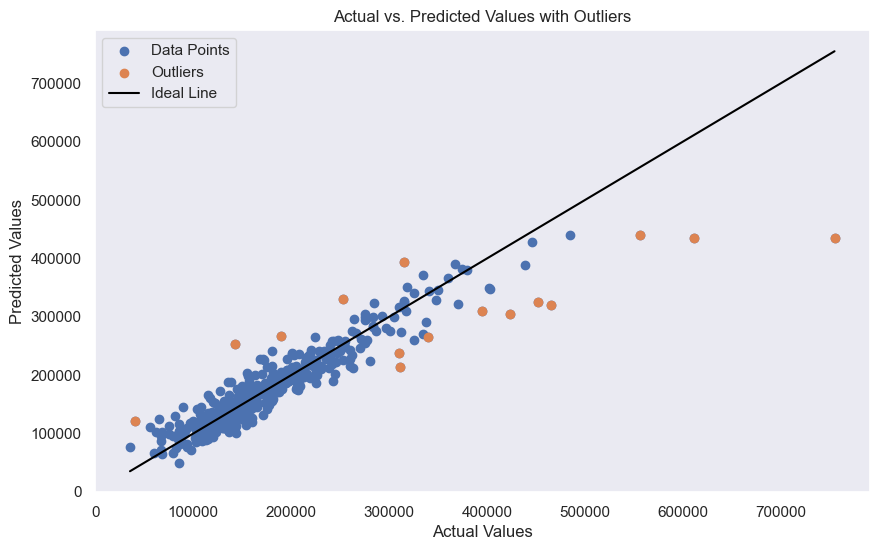

In [210]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test3, y_pred_lr3_test, label='Data Points')
plt.scatter(y_test3[outliers], y_pred_lr3_test[outliers], label='Outliers')
plt.plot([min(y_test3), max(y_test3)], [min(y_test3), max(y_test3)], color='black', linestyle='-', label='Ideal Line')
plt.title('Actual vs. Predicted Values with Outliers')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

In [211]:
# We have 15 outliers out of 438 test datapoints

In [212]:
# Checking the normality of residuals

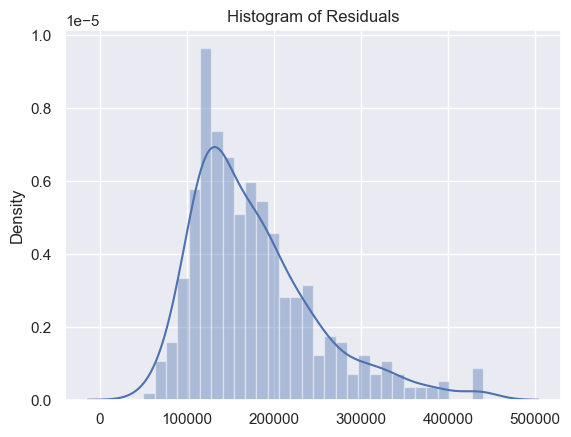

In [213]:
sns.distplot(y_pred_lr3_test,bins = 30)
plt.title('Histogram of Residuals')
plt.show()

In [214]:
y_test3_outliers = pd.DataFrame(y_test3[outliers], columns = ['Actual Price'])
y_pred_lr_test3_outliers = pd.DataFrame(y_pred_lr3_test[outliers], columns = ['Predicted Price'])


In [215]:
x_test3_outliers = pd.DataFrame(x_test3[outliers], columns = x_las.columns)

In [216]:
res_df = pd.concat([x_test3_outliers,y_test3_outliers,y_pred_lr_test3_outliers],axis = 1)

In [217]:
res_df.sort_values(by = 'Predicted Price', ascending = False)

,LotArea,MasVnrArea,GrLivArea,BsmtFullBath,FullBath,KitchenAbvGr,GarageArea,WoodDeckSF,ScreenPorch,RemodAge,MSSubClass_50,LotConfig_CulDSac,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Condition1_Feedr,OverallQual_6,OverallQual_8,OverallQual_9,Exterior1st_BrkFace,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_No,BsmtFinType1_GLQ,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_TA,FireplaceQu_Gd,FireplaceQu_TA,SaleCondition_Partial,Actual Price,Predicted Price
5,16056.0,208.0,2868.0,0.0,3.0,1.0,716.0,214.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,556581,440159.253436
4,21535.0,1170.0,4316.0,0.0,3.0,1.0,832.0,382.0,0.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,755000,435646.581969
3,12919.0,760.0,2364.0,1.0,2.0,1.0,820.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,611657,434699.966716
12,11694.0,452.0,1828.0,0.0,2.0,1.0,774.0,0.0,260.0,16.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,314813,394589.754476
1,12704.0,306.0,2042.0,0.0,2.0,1.0,1390.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,253293,331067.410069
2,13478.0,420.0,2296.0,1.0,2.0,1.0,842.0,382.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,451950,325599.658727
8,13891.0,0.0,2076.0,1.0,2.0,1.0,850.0,216.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,465000,320977.944110
7,14226.0,375.0,1973.0,0.0,2.0,1.0,895.0,315.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,395000,310504.966722
14,20896.0,0.0,2097.0,1.0,1.0,1.0,1134.0,192.0,0.0,17.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,423000,305133.960746
13,10186.0,0.0,1923.0,1.0,2.0,1.0,564.0,240.0,0.0,31.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,190000,267912.015341


Analysing the residual outliers we can see that some datapoints dont have MasVnrArea or WoodDeckSF or BsmtFullBath for the price prediction.
Also these maybe outliers as we have kept only Significant variables for model Building.

In [218]:
# Our Final Model has a test r2 score of 84%
# MAPE is 12% and RMSE is at 32500
# Normality of residuals is checked.
# There is no auto-correlation found as the Durbin Watson test is 1.914 which is closer to 2.